In [1]:
# This file focus on the analyzing the top suicide rate of different countries
# 1. Find out the top 5 countries with highest youth suicide rate 

import os
import math
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append(os.path.abspath('..'))
from common_lib.data_reader import SuicideDataReader, SuicideRawData, SuicideProcessedData

In [2]:
# ========= Getting Data =========

data_reader = SuicideDataReader()

suicide_rates_dataframe = data_reader.read_data(SuicideProcessedData.SUICIDE_RATES)
print(suicide_rates_dataframe)

country_facilities_dataframe = data_reader.read_data(SuicideProcessedData.FACILITIES)
print(country_facilities_dataframe)

         country         sex  80_above  70to79  60to69  50to59  40to49  \
0    Afghanistan  Both sexes      42.0    11.0     5.5     5.6     6.6   
1    Afghanistan        Male      70.4    20.9     9.8     9.3    10.5   
2    Afghanistan      Female      20.1     2.3     1.4     1.6     2.3   
3        Albania  Both sexes      16.3     8.3     6.0     7.8     9.1   
4        Albania        Male      23.2    11.9     8.1    11.4    13.5   
..           ...         ...       ...     ...     ...     ...     ...   
544       Zambia        Male     152.1    79.0    38.7    27.3    17.0   
545       Zambia      Female      31.2    26.4    16.0    11.2     6.9   
546     Zimbabwe  Both sexes     205.7    81.5    41.3    29.4    19.2   
547     Zimbabwe        Male     285.0   111.5    62.8    47.0    30.1   
548     Zimbabwe      Female     152.4    59.4    26.4    16.0     9.4   

     30to39  20to29  10to19  all_age  
0       9.2    10.2     3.1     93.2  
1      15.1    16.3     4.8    15

In [9]:
# ========= Prepare Data =========
# join country facilities to suicde rate data
suicide_rates_facilities_dataframe = suicide_rates_dataframe.merge(country_facilities_dataframe, how="left", left_on="country", right_on="country")

# Sorting and pick the first 5
# top_five_youth_suicide_rates_dataframe = suicide_rates_facilities_dataframe.sort_values(by=["10to19"], ascending=False).head(5)

# # print the results
# top_five_youth_suicide_rates_dataframe

country         sex  80_above  70to79  60to69  50to59  40to49  30to39  \
262  Kiribati        Male      71.0    30.5    23.5    17.6    19.7    30.2   
223   Iceland        Male       0.0    12.2    37.4    17.7    38.2    30.5   
212    Guyana      Female       0.0     9.9    13.2    19.1    21.8    15.0   
210    Guyana  Both sexes      38.6    29.8    31.7    46.6    54.8    40.0   
211    Guyana        Male      91.4    53.6    52.1    73.8    86.5    66.2   

     20to29  10to19  all_age    year  mental_hospitals  health_units  \
262    57.4    24.2    274.1     NaN               NaN           NaN   
223    25.1    21.2    182.3  2016.0             0.303         4.542   
212    19.3    18.4    116.7  2016.0             0.130         0.130   
210    38.0    18.3    297.8  2016.0             0.130         0.130   
211    56.0    18.2    497.8  2016.0             0.130         0.130   

     outpatient_facilities  day_treatment  residential_facilities  
262                    NaN            NaN                     NaN  
223                  3.028            NaN                     NaN  
212                  0.260            NaN                     NaN  
210                  0.260            NaN                     NaN  
211                  0.260            NaN                     NaN

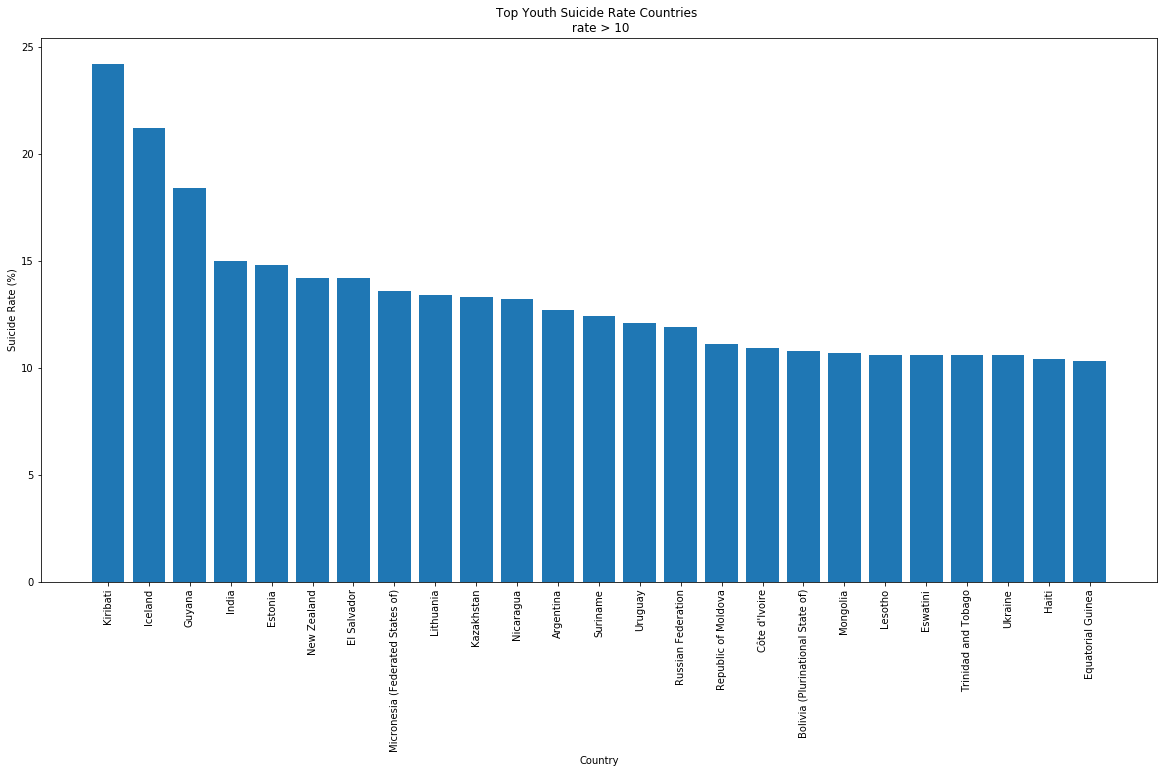

In [15]:
# ========= plot graph =========
top_suicide_rates_country_dataframe = suicide_rates_facilities_dataframe[suicide_rates_facilities_dataframe["10to19"] > 10].sort_values(by=["10to19"], ascending=False)

#top suicide rate plot
plt.figure(figsize=(20,10))
plt.bar(top_suicide_rates_country_dataframe["country"], top_suicide_rates_country_dataframe["10to19"])
plt.title("Top Youth Suicide Rate Countries \n rate > 10")
plt.xlabel("Country")
plt.ylabel("Suicide Rate (%)")
plt.xticks(rotation=90)
plt.show()

<Figure size 1440x720 with 0 Axes>

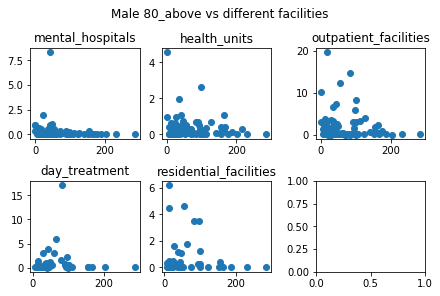

<Figure size 1440x720 with 0 Axes>

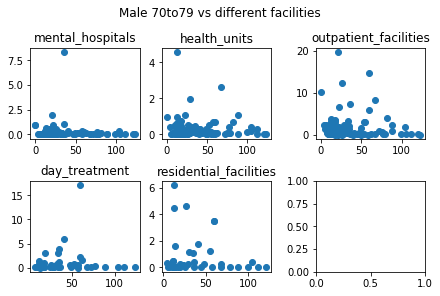

<Figure size 1440x720 with 0 Axes>

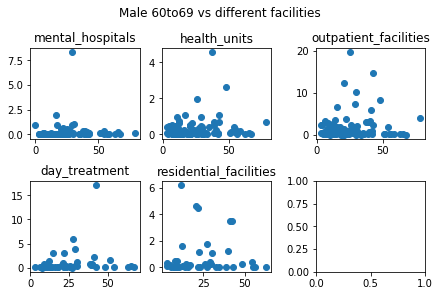

<Figure size 1440x720 with 0 Axes>

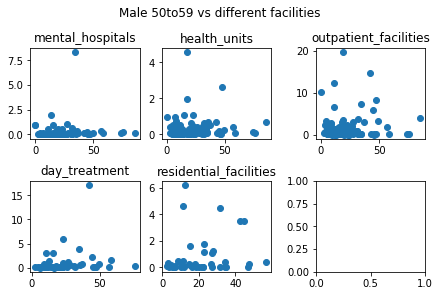

<Figure size 1440x720 with 0 Axes>

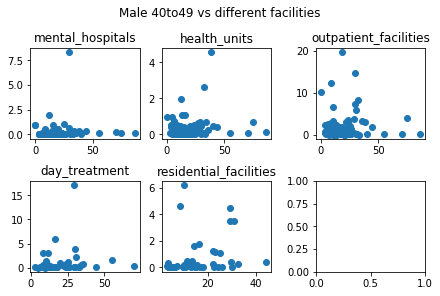

<Figure size 1440x720 with 0 Axes>

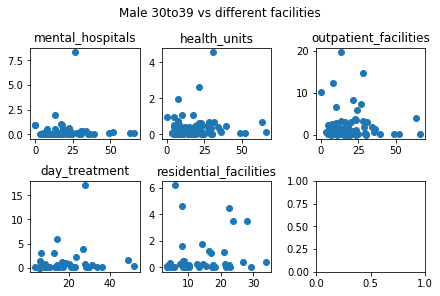

<Figure size 1440x720 with 0 Axes>

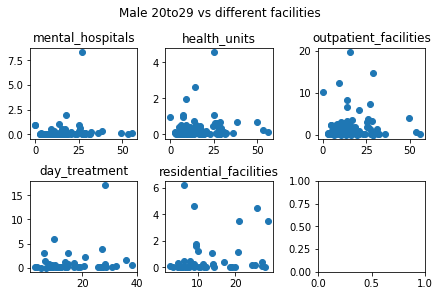

<Figure size 1440x720 with 0 Axes>

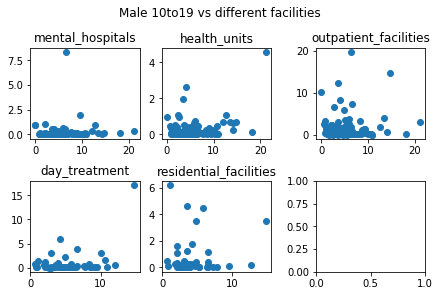

<Figure size 1440x720 with 0 Axes>

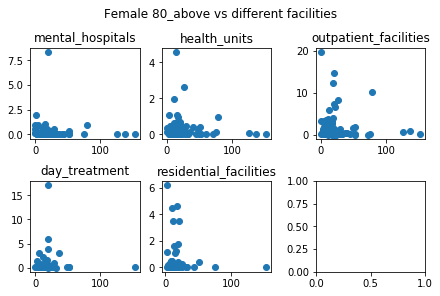

<Figure size 1440x720 with 0 Axes>

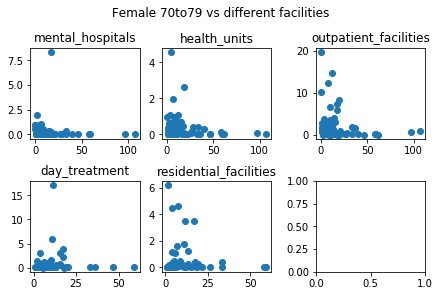

<Figure size 1440x720 with 0 Axes>

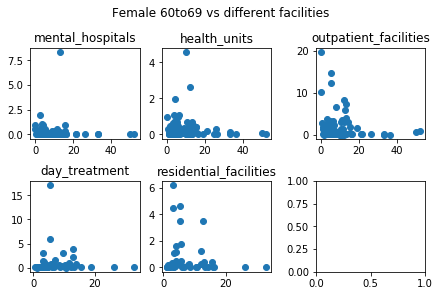

<Figure size 1440x720 with 0 Axes>

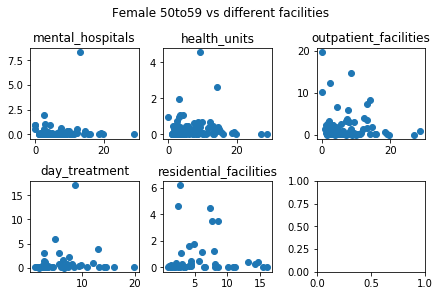

<Figure size 1440x720 with 0 Axes>

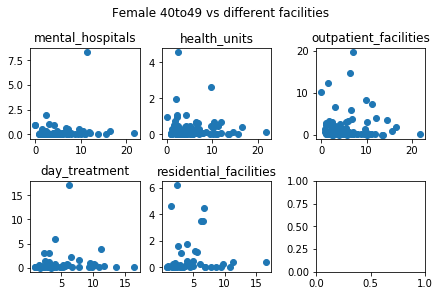

<Figure size 1440x720 with 0 Axes>

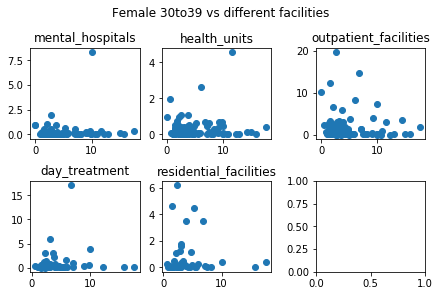

<Figure size 1440x720 with 0 Axes>

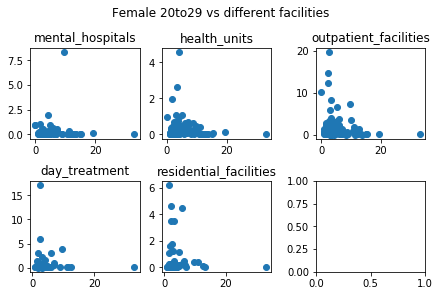

<Figure size 1440x720 with 0 Axes>

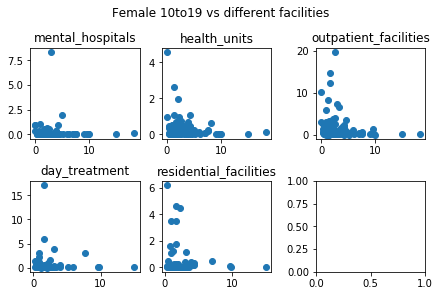

<Figure size 1440x720 with 0 Axes>

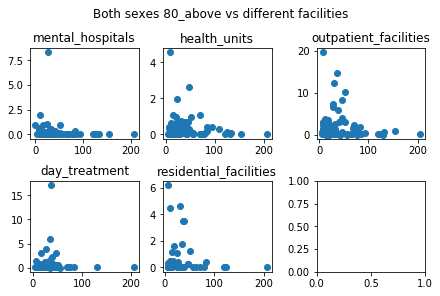

<Figure size 1440x720 with 0 Axes>

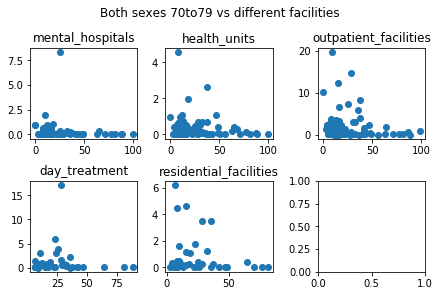

<Figure size 1440x720 with 0 Axes>

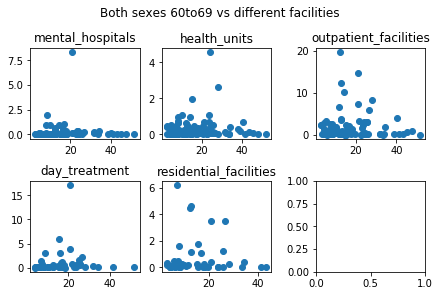

<Figure size 1440x720 with 0 Axes>

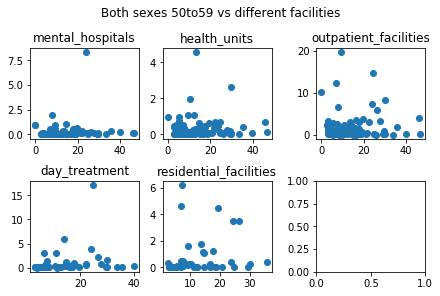

<Figure size 1440x720 with 0 Axes>

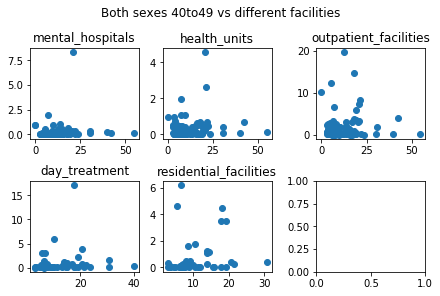

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

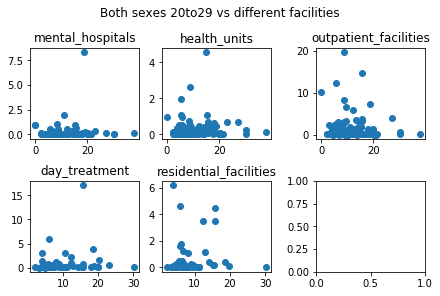

<Figure size 1440x720 with 0 Axes>

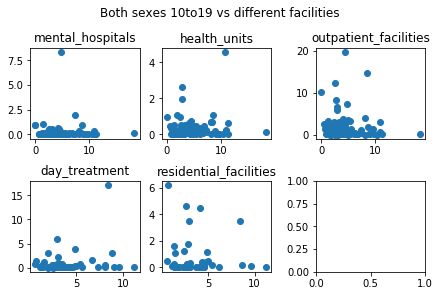

In [16]:
# plot the suicide rate vs different facilities for analysis
ALL_SEX = top_suicide_rates_country_dataframe["sex"].unique()
ALL_AGE_RANGES = ["80_above", "70to79", "60to69", "50to59", "40to49", "30to39", "20to29", "10to19"]
ALL_FACILITIES = ["mental_hospitals", "health_units", "outpatient_facilities", "day_treatment", "residential_facilities"]

for sex in ALL_SEX:
	for age_range in ALL_AGE_RANGES:
		plt.figure(figsize=(20,10))
		fig, axs = plt.subplots(nrows=2, ncols=3, constrained_layout=True)
		fig.figsize=(20,10)
		facilities_index = 0	# use for control the location of the plot
		for facility in ALL_FACILITIES:
			x_index = math.floor(facilities_index / 3)
			y_index = facilities_index % 3
			subplot = axs[x_index, y_index]
			subplot.scatter(suicide_rates_facilities_dataframe[suicide_rates_facilities_dataframe["sex"] == sex][age_range], suicide_rates_facilities_dataframe[suicide_rates_facilities_dataframe["sex"] == sex][facility])
			subplot.set_title("{0}".format(facility))
			#subplot.xlabel("{0} {1} suicide Rate (%)".format(sex, age_range))
			#subplot.ylabel("{0}".format(facility))
			plt.suptitle("{0} {1} vs different facilities".format(sex, age_range))
			facilities_index = facilities_index + 1

		plt.show()